In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import sys
sys.path.insert(1, "../python/functions")
sys.path.insert(2, "../python/architecture")

In [3]:
from data_prep_functions import mnist_prep
from model_functions import *
from plotting_functions import *
# from new_Adam import *
import no_gpu
import reproducible

In [4]:
import time

In [5]:
X_train, X_val, y_train, y_val = mnist_prep()

In [6]:
# use samller dataset for increased speed
X_train_small = X_train[:1000, :]
X_val_small = X_val[:500, :]
y_train_small = y_train[:1000]
y_val_small = y_val[:500]

n_cols = X_train_small.shape[1]

In [7]:
model = nn_model_structure(layers = 5,
                           neurons = [128, 128, 64, 32, 10],
                           n_cols = X_train_small.shape[1])
model = nn_model_compile(model,
                         optimizer = "adam")

Epoch 1/10
10/10 [==============================] - 0s 23ms/step - loss: 2.1584 - accuracy: 0.2450 - val_loss: 1.9529 - val_accuracy: 0.4460
Epoch 2/10
10/10 [==============================] - 0s 5ms/step - loss: 1.5613 - accuracy: 0.5980 - val_loss: 1.4080 - val_accuracy: 0.6080
Epoch 3/10
10/10 [==============================] - 0s 5ms/step - loss: 0.9704 - accuracy: 0.7450 - val_loss: 0.9410 - val_accuracy: 0.7340
Epoch 4/10
10/10 [==============================] - 0s 5ms/step - loss: 0.5888 - accuracy: 0.8460 - val_loss: 0.7272 - val_accuracy: 0.7880
Epoch 5/10
10/10 [==============================] - 0s 6ms/step - loss: 0.4111 - accuracy: 0.8900 - val_loss: 0.6052 - val_accuracy: 0.8200
Epoch 6/10
10/10 [==============================] - 0s 5ms/step - loss: 0.2966 - accuracy: 0.9230 - val_loss: 0.5334 - val_accuracy: 0.8340
Epoch 7/10
10/10 [==============================] - 0s 6ms/step - loss: 0.2261 - accuracy: 0.9420 - val_loss: 0.5090 - val_accuracy: 0.8460
Epoch 8/10
10/10 [=

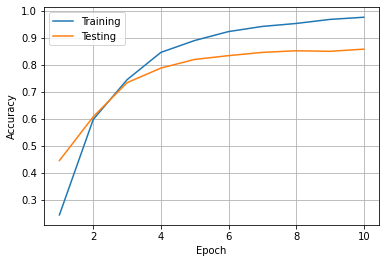

In [8]:
start_time = time.time()
model = nn_model_fit(model,
                     X_train = X_train_small,
                     y_train = y_train_small,
                     X_val = X_val_small,
                     y_val = y_val_small,
                     batch_size = 100,
                     epochs = 10)
end_time = time.time()
print("Overall calculation took {} seconds.".format(end_time - start_time))
model.summary()
nn_plot_acc(model)
# nn_save(model, "../models/model_test_small.h5")

In [9]:
true_acc = model.evaluate(X_val_small, y_val_small)[1]
print(true_acc)

shape_0 = model.get_weights()[0].shape
print(shape_0)

old_first_weights = model.get_weights()[0]

# first_weights = [np.random.normal(size = shape_0)]
first_weights = [model.get_weights()[0]-1]
print(first_weights)
print(first_weights[0].shape)

all_weights = first_weights + model.get_weights()[1:]
# print(all_weights)

model.set_weights(all_weights)

fake_acc = model.evaluate(X_val_small, y_val_small)[1]
print(fake_acc)

old_weights = [old_first_weights] + model.get_weights()[1:]

model.set_weights(old_weights)

old_true_acc = model.evaluate(X_val_small, y_val_small)[1]
print(old_true_acc)

16/16 [==============================] - 0s 977us/step - loss: 0.4496 - accuracy: 0.8580
0.8579999804496765
(784, 128)
[array([[-0.9825663 , -1.0448595 , -0.9829941 , ..., -1.081005  ,
        -1.039437  , -1.0173888 ],
       [-1.059742  , -1.0050594 , -0.9819378 , ..., -1.0406951 ,
        -0.95030135, -0.9664014 ],
       [-1.0499504 , -0.93690425, -1.0077294 , ..., -1.0569363 ,
        -0.9651943 , -1.0480372 ],
       ...,
       [-0.9385758 , -1.009917  , -0.9512942 , ..., -1.0546863 ,
        -0.93100244, -0.9971716 ],
       [-1.0451013 , -0.95852774, -1.0559828 , ..., -0.98283786,
        -1.0297642 , -0.90140915],
       [-1.0990843 , -0.99812406, -0.9116216 , ..., -0.9515942 ,
        -0.9846809 , -0.9902688 ]], dtype=float32)]
(784, 128)
16/16 [==============================] - 0s 974us/step - loss: 2.3433 - accuracy: 0.1340
0.1340000033378601
16/16 [==============================] - 0s 1ms/step - loss: 0.4496 - accuracy: 0.8580
0.8579999804496765


# EnKF

In [ ]:
init_model = nn_model_structure(layers = layers,
                                neurons = neurons,
                                n_cols = n_cols)
model = nn_model_compile(init_model,
                         optimizer = "sgd")

In [ ]:
for params in model.get_weights():
    print(params.shape)

In [ ]:
weights = model.get_weights()

In [ ]:
np.append(np.array(weights[1].shape),0)

In [ ]:
shapes = [np.array(params.shape) for params in weights]
shape_elements = [np.prod(shape) for shape in shapes]

In [ ]:
shapes

In [ ]:
shape_elements

In [ ]:
X_train_b1 = X_train[0:250] 
y_train_b1 = y_train[0:250] 
X_train_b2 = X_train[250:500] 
y_train_b2 = y_train[250:500]
X_train_b3 = X_train[500:750] 
y_train_b3 = y_train[500:750] 
X_train_b4 = X_train[750:1000] 
y_train_b4 = y_train[750:1000]
# batch_size * 0, ..., n/batch_size

In [ ]:
len(X_train_b1)

In [ ]:
y_pred = model.predict(X_train_b1)

In [ ]:
y_pred

In [ ]:
y_pred.shape

In [ ]:
np.array(y_train_b1).shape

In [ ]:
np.multiply(np.array([[1, 2],[3, 4]]),np.array([[5, 6],[7, 8]]))

In [ ]:
np.log([[1, np.e],[np.e**2, 0]])

In [ ]:
np.sum(np.multiply(np.array(y_train_b1), np.log(y_pred))) # Frobenius-Skalarprodukt

In [ ]:
import tensorflow as tf

loss_fct = tf.keras.losses.CategoricalCrossentropy(reduction = "none")

y_train_b1_tf = tf.constant(y_train_b1)
y_pred_tf = tf.Variable(y_pred)
with tf.GradientTape() as tape:
    loss_value = loss_fct(y_train_b1_tf, y_pred_tf)
    
jacobian_tf = tape.gradient(loss_value, y_pred_tf)

In [ ]:
jacobian_tf.numpy()[0]

#### Das stimmt aber nicht wirklich. In meiner Arbeit habe ich da analog zum Paper andere Werte!!!

In [ ]:
np.array(y_train_b1)

In [ ]:
(1/y_pred)[0]

In [ ]:
for i in y_pred[0]:
    print(1/i)

In [ ]:
jacobian = (-1) * np.multiply(np.array(y_train_b1), np.array(1 / (y_pred + delta)))

In [ ]:
jacobian[0]

In [ ]:
jacobian.shape

#### Das sieht schon eher nach der Jacobi-Matrix aus.

## Für mehrere Partikel

In [ ]:
np.mean(list(y_pred_dict.values()), axis = 0) # shape is again (250, 10)

In [ ]:
y_pred_mean = np.mean(list(y_pred_dict.values()), axis = 0)

In [ ]:
k=j=1

In [ ]:
y_pred_centered = y_pred_dict["model_{}".format(str(k+1))] - y_pred_mean

In [ ]:
y_pred_centered.shape

In [ ]:
jacobian_dict["model_{}".format(str(j+1))].shape

In [ ]:
np.sum(np.multiply(y_pred_centered, jacobian_dict["model_{}".format(str(j+1))]))

In [ ]:
d = np.zeros(shape = (particles, particles))
for k in range(particles):
    y_pred_centered = y_pred_dict["model_{}".format(str(k+1))] - y_pred_mean
    for j in range(particles):
        d[k][j] = np.sum(np.multiply(y_pred_centered, jacobian_dict["model_{}".format(str(j+1))]))

In [ ]:
d.shape

In [ ]:
d

In [ ]:
h_t = h_0 / (np.sqrt(np.sum(d**2)) + epsilon)

In [ ]:
h_t

In [ ]:
weights_dict["model_1"]

In [ ]:
for i, w_b in enumerate(weights_dict["model_1"]):
    weights_dict["model_1"][i] = np.reshape(w_b, (1, -1))
    print(i)
    print(w_b)

In [ ]:
for w_b in weights_dict["model_1"]:
    print(w_b.shape)

In [ ]:
type(weights_dict["model_1"])

In [ ]:
weights_vector = np.concatenate(weights_dict["model_1"], axis = 1)

In [ ]:
weights_vector

In [ ]:
weights_vector.shape

In [ ]:
shape_elements

In [ ]:
shapes

In [ ]:
tuple(shapes[0])

In [ ]:
for i in range(len(shape_elements)-1):
    print(np.reshape(weights_vector[0][shape_elements[i]:shape_elements[i+1]], tuple(shapes[i])).shape)

In [ ]:
i=0
weights_vector[(shape_elements[i]):(shape_elements[i+1])].shape

In [ ]:
shape_elements[1]

In [ ]:
i=0
start = shape_elements[i]
end = shape_elements[i+1]

weights_vector[start:end].shape

In [ ]:
weights_vector[0]

In [ ]:
for f in range(len(weights_dict["model_1"])):
    print(weights_dict["model_1"][f].shape)

In [ ]:
len(shape_elements)-1

In [ ]:
l=0
start = shape_elements[l]
end = shape_elements[l+1]

In [ ]:
start, end

In [ ]:
i=0
weights_vector_dict["model_{}".format(str(i+1))][start:end].shape

In [ ]:
len(weights_dict["model_{}".format(str(i+1))])

In [ ]:
np.array(list(weights_vector_dict.values())[0]).ravel()

In [ ]:
np.array(list(weights_vector_dict.values())).shape

In [ ]:
np.reshape(np.array([2,2]), (1, 2))

In [ ]:
weights_all_ptcls = np.array(list(weights_vector_dict.values()))

In [ ]:
weights_all_ptcls

In [ ]:
np.reshape(weights_all_ptcls, (5, 127658)).shape

In [ ]:
type(weights_vector_dict["model_1"])

In [ ]:
np.array([np.array([1,2]),np.array([3,4])])

In [ ]:
d[0:2,0:2]

In [ ]:
np.matmul(d[:2,:2], np.array([np.array([1,2]),np.array([3,4])])) # richtige Matrixmultiplikation

In [ ]:
weights_all_ptcls.shape

### Batches bestimmen

In [ ]:
batch_size = 99

In [ ]:
n = len(X_train)
num_batches = int(np.ceil(n / batch_size))
batch_indices = np.cumsum([0] + list(np.ones(num_batches) * batch_size))
batch_indices[-1] = n

In [ ]:
batch_indices

In [ ]:
X_batches = [X_train[int(batch_indices[i]):int(batch_indices[i+1])] for i in range(len(batch_indices)-1)]
y_batches = [y_train[int(batch_indices[i]):int(batch_indices[i+1])] for i in range(len(batch_indices)-1)]

In [ ]:
for batch in y_batches:
    print(batch.shape)

In [ ]:
len(X_batches)

# Ab hier wird es spannend

In [10]:
X_train = X_train_small
X_test = X_val_small
y_train = y_train_small
y_test = y_val_small

In [11]:
batch_size = 250
epochs = 3
particles = 5
early_stopping = 0.001
batch_normal = False

In [12]:
layers = 5
neurons = [128, 128, 64, 32, 10]
n_cols = X_train.shape[1]

In [13]:
delta = 0.005
h_0 = 300
epsilon = 0.005

In [14]:
n = len(X_train)
num_batches = int(np.ceil(n / batch_size))
batch_indices = np.cumsum([0] + list(np.ones(num_batches) * batch_size))
batch_indices[-1] = n

In [15]:
X_batches = [X_train[int(batch_indices[i]):int(batch_indices[i+1])] for i in range(len(batch_indices)-1)]
y_batches = [y_train[int(batch_indices[i]):int(batch_indices[i+1])] for i in range(len(batch_indices)-1)]

In [ ]:
# start_time = time.time()

In [16]:
model_dict = {}
weights_dict = {}
y_pred_dict = {}
jacobian_dict = {}
weights_vector_dict = {}

init_model = nn_model_structure(layers = layers,
                                neurons = neurons,
                                n_cols = n_cols)
init_model = nn_model_compile(init_model,
                              optimizer = "sgd")
weights = init_model.get_weights()
shapes = [np.array(params.shape) for params in weights]
shape_elements = np.cumsum([0] + [np.prod(shape) for shape in shapes])

In [17]:
for i in range(particles):
    # just an initial model with the correct structure regarding neurons, layers, activation functions, Glorot initialization
    model = nn_model_structure(layers = layers,
                               neurons = neurons,
                               n_cols = n_cols)
    model = nn_model_compile(model,
                             optimizer = "sgd")
    # for every particle write the model in a dictionary
    model_dict["model_{}".format(str(i+1))] = model
    
    # for every particles write the weights and biases in a dictionary
    weights_dict["model_{}".format(str(i+1))] = model_dict["model_{}".format(str(i+1))]\
                                                    .get_weights()

In [18]:
for i in range(particles):
    print(model_dict["model_{}".format(str(i+1))].evaluate(X_val_small, y_val_small)[1])

16/16 [==============================] - 0s 1ms/step - loss: 2.3586 - accuracy: 0.0960
0.09600000083446503
16/16 [==============================] - 0s 974us/step - loss: 2.3362 - accuracy: 0.0900
0.09000000357627869
16/16 [==============================] - 0s 974us/step - loss: 2.3503 - accuracy: 0.1080
0.1080000028014183
16/16 [==============================] - 0s 0s/step - loss: 2.4043 - accuracy: 0.0880
0.08799999952316284
16/16 [==============================] - 0s 974us/step - loss: 2.3688 - accuracy: 0.0780
0.07800000160932541


In [19]:
# loop over all epochs
for epoch in range(epochs):
    # loop over all batches
    for b in range(len(X_batches)):
        for i in range(particles):
            # for every particle write the predictions on the training batches in a dictionary
            y_pred_dict["model_{}".format(str(i+1))] = model_dict["model_{}".format(str(i+1))]\
                                                            .predict(X_batches[b])
            
            # for every particle write the Jacobian in a dictionary
            jacobian_dict["model_{}".format(str(i+1))] = (-1) * np.multiply(np.array(y_batches[b]), 
                                                                            np.array(1 / (y_pred_dict["model_{}".format(str(i+1))] + delta)))
        
        # compute the mean of the predictions
        y_pred_mean = np.mean(list(y_pred_dict.values()), axis = 0)

        # compute the matrix D elementwise
        d = np.zeros(shape = (particles, particles))
        for k in range(particles):
            y_pred_centered = y_pred_dict["model_{}".format(str(k+1))] - y_pred_mean
            for j in range(particles):
                d[k][j] = np.sum(np.multiply(y_pred_centered, jacobian_dict["model_{}".format(str(j+1))]))

        # compute the scalar h_t
        h_t = h_0 / (np.sqrt(np.sum(d**2)) + epsilon)

        # Reshape the weights and biases so that they are no longer matrices and vectores, but now one single vector
        for i in range(particles):
            for j, w_b in enumerate(weights_dict["model_{}".format(str(i+1))]):
                weights_dict["model_{}".format(str(i+1))][j] = np.reshape(w_b, (1, -1))
            weights_vector_dict["model_{}".format(str(i+1))] = np.concatenate(weights_dict["model_{}".format(str(i+1))], axis = 1).ravel()
        
        # matrix with particle parameters as row vectors
        weights_all_ptcls = np.array(list(weights_vector_dict.values()))

        # compute the matrix with the updates for each particle
        weights_all_ptcls = weights_all_ptcls - h_t * np.matmul(d, weights_all_ptcls)

        for i in range(particles):
            # write the updates back into the dictionary
            weights_vector_dict["model_{}".format(str(i+1))] = weights_all_ptcls[i]
            # reshape the updates, so that they are of the original matrx and vector shape
            for l in range(len(shape_elements)-1):
                start = shape_elements[l]
                end = shape_elements[l+1]
                weights_dict["model_{}".format(str(i+1))][l] = np.reshape(weights_vector_dict["model_{}".format(str(i+1))][start:end], tuple(shapes[l]))
            # set new weights for model
            model_dict["model_{}".format(str(i+1))].set_weights(weights_dict["model_{}".format(str(i+1))])

In [20]:
for i in range(particles):
    print(model_dict["model_{}".format(str(i+1))].evaluate(X_val_small, y_val_small)[1])

16/16 [==============================] - 0s 976us/step - loss: nan - accuracy: 0.0840
0.08399999886751175
16/16 [==============================] - 0s 407us/step - loss: nan - accuracy: 0.0840
0.08399999886751175
16/16 [==============================] - 0s 978us/step - loss: nan - accuracy: 0.0840
0.08399999886751175
16/16 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.0840
0.08399999886751175
16/16 [==============================] - 0s 975us/step - loss: nan - accuracy: 0.0840
0.08399999886751175


In [ ]:
# end_time = time.time()
# print("Overall calculation took {} seconds.".format(end_time - start_time))